# DSCI 303 - Homework 05
### Vincent Regazzi

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [2]:
x = np.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])
n = len(x)
mean = np.sum(x) / n
diff = x - mean
var = (np.sum(diff**2)) / (n - 1)
print(f'Sample Mean:     {mean}')
print(f'Sample Variance: {var}')

Sample Mean:     16.6
Sample Variance: 25.6


In [3]:
mean_np = np.mean(x)
var_np = np.var(x, ddof = 1)
print(f'Sample Mean:     {mean_np}')
print(f'Sample Variance: {var_np}')

Sample Mean:     16.6
Sample Variance: 25.6


## Problem 2: Scoring a Regression Model

In [4]:
def find_sse(true_y, pred_y):
    true = np.array(true_y)
    pred = np.array(pred_y)
    return np.sum((true - pred)**2)

In [5]:
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])

sse_1 = find_sse(true_y, pred_1)
sse_2 = find_sse(true_y, pred_2)

print(f'Model 1 SSE: {round(sse_1, 2):.02f}')
print(f'Model 2 SSE: {round(sse_2, 2):.02f}')

Model 1 SSE: 22.66
Model 2 SSE: 19.90


## Problem 3: Scoring a Classification Model

In [6]:
def find_accuracy(true_y, pred_y):
    true = np.array(true_y)
    pred = np.array(pred_y)
    return np.sum(true_y == pred_y) / len(pred_y)

In [7]:
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N',
'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N',
'N', 'P', 'N'])
print(f'Model Accuracy: {find_accuracy(true_diag, pred_diag)}')

Model Accuracy: 0.75


In [8]:
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])
print(f'Model Accuracy: {find_accuracy(true_labels, pred_labels)}')

Model Accuracy: 0.875


## Problem 4: Classification Report

In [9]:
def classification_report(true_y, pred_y):
    classes = np.unique(true_y)
    accuracy = find_accuracy(true_y, pred_y)
    
    tp = np.sum((classes[1] == pred_y) & (classes[1] == true_y))
    fp = np.sum((classes[1] == pred_y) & (classes[0] == true_y))
    tn = np.sum((classes[0] == pred_y) & (classes[0] == true_y))
    fn = np.sum((classes[0] == pred_y) & (classes[1] == true_y))

    posPrec = tp / (tp + fp)
    posRec = tp / (tp + fn)
    negPrec = tn / (tn + fn)
    negRec = tn / (tn + fp)
    
    print(f'Positive Class:     {classes[1]}')
    print(f'Negative Class:     {classes[0]}')
    print()
    print(f'Accuracy:           {accuracy:.04f}')
    print(f'Positive Precision: {posPrec:.04f}')
    print(f'Positive Recall:    {posRec:.04f}')
    print(f'Negative Precision: {negPrec:.04f}')
    print(f'Negative Recall:    {negRec:.04f}')

In [10]:
classification_report(true_diag, pred_diag)

Positive Class:     P
Negative Class:     N

Accuracy:           0.7500
Positive Precision: 0.5556
Positive Recall:    0.8333
Negative Precision: 0.9091
Negative Recall:    0.7143


In [11]:
classification_report(true_labels, pred_labels)

Positive Class:     dog
Negative Class:     cat

Accuracy:           0.8750
Positive Precision: 0.8333
Positive Recall:    0.9091
Negative Precision: 0.9167
Negative Recall:    0.8462


## Problem 5: Transformation and Random Variables

In [12]:
X = np.random.normal(loc = 0, scale = 0.4, size = 25000)
Y = np.exp(X)

print(f'Sample Mean of X:   {np.mean(X): .04f}')
print(f'Sample Std Dev of X: {np.std(X, ddof = 1):.04f}')
print(f'Sample Mean of Y:    {np.mean(Y):.04f}')
print(f'Sample Std Dev of Y: {np.std(Y, ddof = 1):.04f}')

Sample Mean of X:   -0.0045
Sample Std Dev of X: 0.4007
Sample Mean of Y:    1.0787
Sample Std Dev of Y: 0.4505


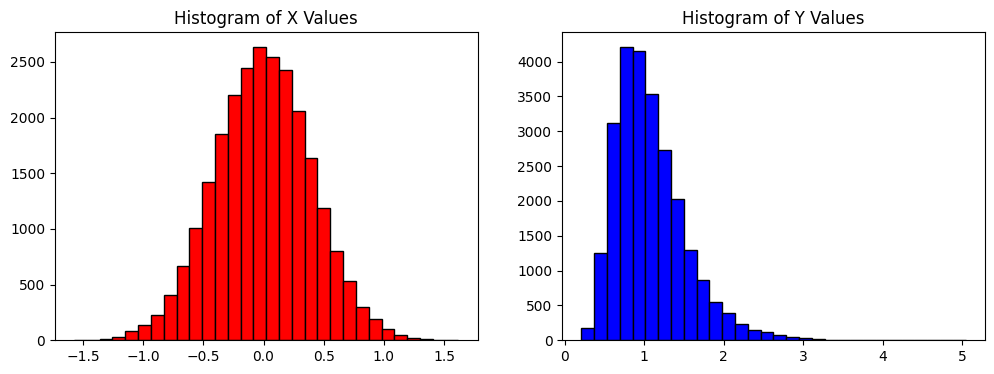

In [13]:
plt.figure(figsize = [12, 4])
plt.subplot(1, 2, 1)
plt.hist(X, edgecolor='k', color='red', bins=30)
plt.title("Histogram of X Values")

plt.subplot(1, 2, 2)
plt.hist(Y, edgecolor='k', color='blue', bins=30)
plt.title("Histogram of Y Values")

plt.show()

In [14]:
print(f'Probability that Y is less than 0.5: {np.mean(Y < 0.5):.04f}')
print(f'Probability that Y is less than 1.0: {np.mean(Y < 1.0):.04f}')
print(f'Probability that Y is less than 2.0: {np.mean(Y < 2.0):.04f}')

Probability that Y is less than 0.5: 0.0424
Probability that Y is less than 1.0: 0.5027
Probability that Y is less than 2.0: 0.9586


## Problem 6: Stochastic Linear Relationships

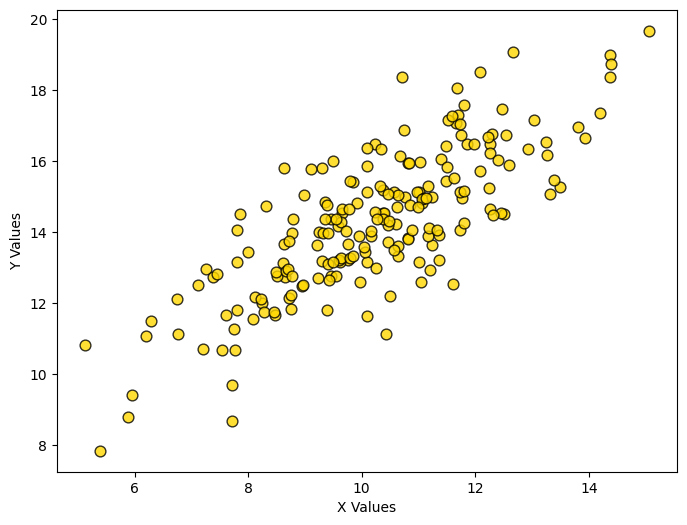

In [15]:
np.random.seed(seed = 1)
x_vals = np.random.normal(loc = 10, scale = 2, size = 200)
errors = np.random.normal(loc = 0, scale = 1.2, size = 200)
y_vals = np.array(5.1 + 0.9 * x_vals + errors)

plt.figure(figsize = [8, 6])
plt.scatter(x = x_vals, y = y_vals, s=60, alpha=0.8, color='gold', edgecolor='black')
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()


In [16]:
diff_x = np.array(x_vals - np.mean(x_vals))
diff_y = np.array(y_vals - np.mean(y_vals))
top = np.sum(diff_x * diff_y)
bottom = np.sqrt(np.sum(diff_x ** 2) * np.sum(diff_y ** 2))
r = top / bottom
print(f'Correlation between X and Y: {r:.04f}')

Correlation between X and Y: 0.7861


## Problem 7: Relationship between Life Expectancy and Per Capita GDP

In [17]:
import pandas as pd
df = pd.read_csv('gapminder_data.txt', sep='\t')
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [18]:
continent_list = ['africa', 'americas', 'asia', 'europe']
color_list = ['green', 'red', 'yellow', 'blue']

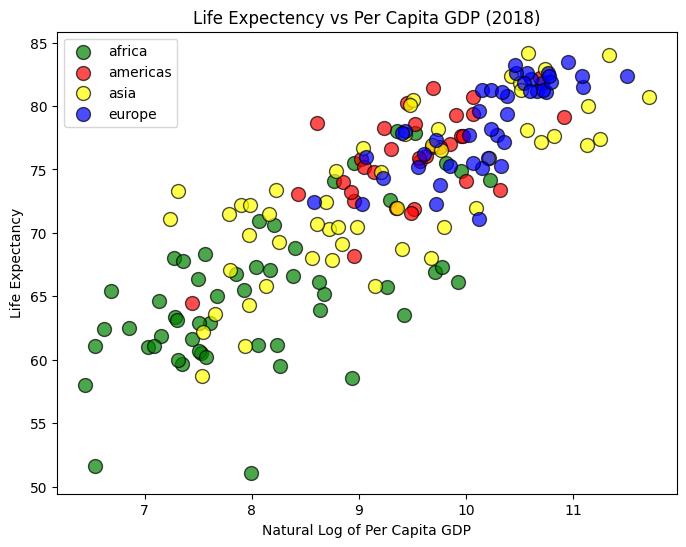

In [19]:
plt.figure(figsize = [8, 6])
for i in range(0, 4):
    sel = (continent == continent_list[i])&(year == 2018)
    
    plt.scatter(x = np.log(pcgdp[sel]), y = life_exp[sel], s=100, alpha=0.7, color=color_list[i], edgecolor='black', label = continent_list[i])
plt.xlabel('Natural Log of Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectency vs Per Capita GDP (2018)')
plt.legend()
plt.show()


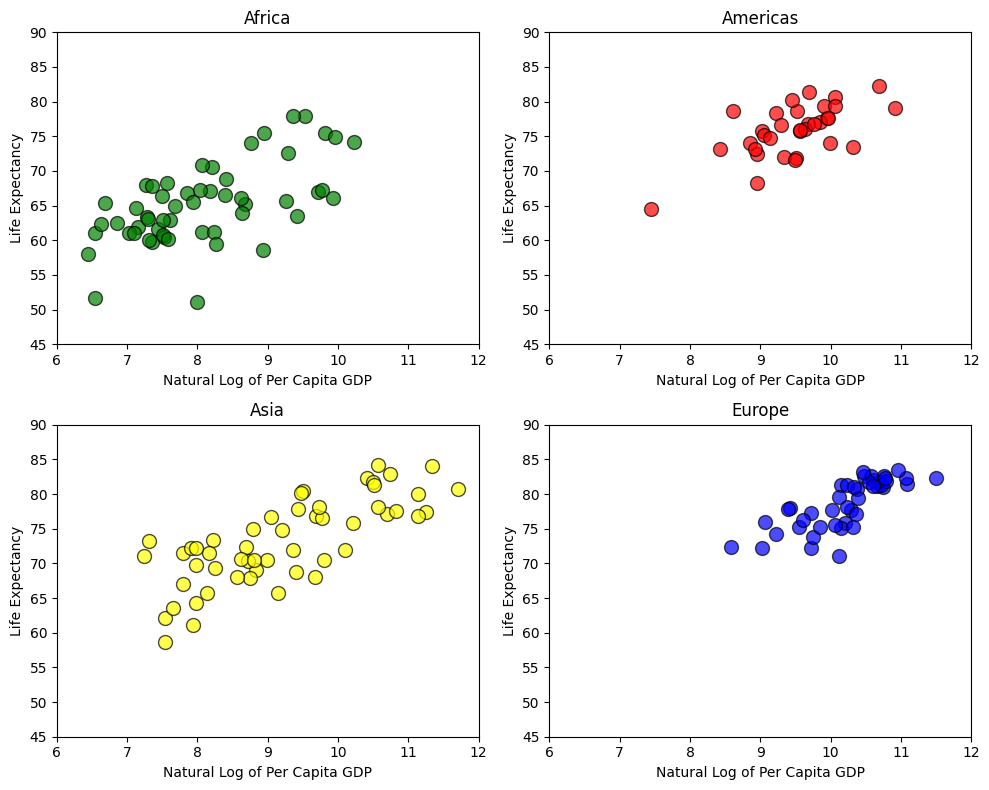

In [20]:
plt.figure(figsize = [10, 8])
for i in range(0, 4):
    plt.subplot(2, 2, i + 1)

    sel = (continent == continent_list[i])&(year == 2018)
    
    plt.scatter(x = np.log(pcgdp[sel]), y = life_exp[sel], s=100, alpha=0.7, color=color_list[i], edgecolor='black')
    plt.xlim([6, 12])
    plt.ylim([45, 90])
    plt.xlabel('Natural Log of Per Capita GDP')
    plt.ylabel('Life Expectancy')
    plt.title(continent_list[i].capitalize())
plt.tight_layout()
plt.show()

## Problem 8: Trends by Country

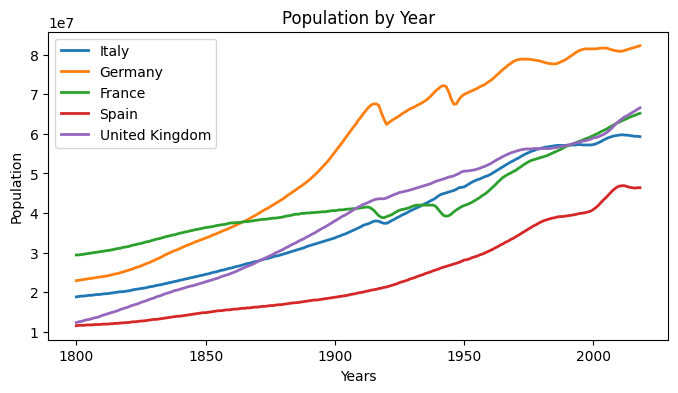

In [21]:
country_list = ['Italy', 'Germany', 'France', 'Spain', 'United Kingdom']
plt.figure(figsize = [8, 4])
for i in range(0, 5):
    sel = (country == country_list[i])
    
    plt.plot(year[sel], population[sel], lw = 2, label = country_list[i])

plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population by Year')
plt.legend()
plt.show()

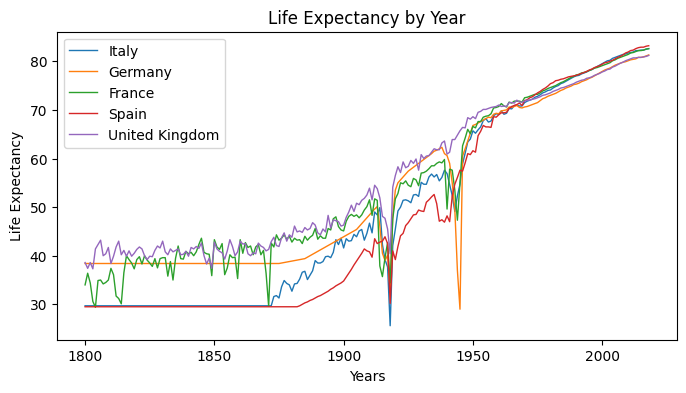

In [22]:
country_list = ['Italy', 'Germany', 'France', 'Spain', 'United Kingdom']
plt.figure(figsize = [8, 4])
for i in range(0, 5):
    sel = (country == country_list[i])
    
    plt.plot(year[sel], life_exp[sel], lw = 1, label = country_list[i])

plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year')
plt.legend()
plt.show()